# Nine Card Analysis

In [1]:
import sys
sys.path.append("scripts")
from gameLogic import *
from scoring import *
from strategies import *
import matplotlib.pyplot as plt

In [2]:
strat_dict = {"Knock at 50": make_constant_score_knock_strategy(50),
              "Knock at 13": make_constant_score_knock_strategy(13),
              "Do not Knock": make_constant_score_knock_strategy(1),
              "No Pile": never_draw_from_pile,
             "Pile if Completes": draw_from_pile_if_completes, 
             "Discard Highest Useless": discard_highest_useless}

In [7]:
game = Game(player_names = ["Bailey", "Dan"],
            strategy_dict = strat_dict,
            knock_strategies = ["Knock at 13", "Knock at 50"],
            pile_strategies = ["No Pile", "Pile if Completes"],
            discard_strategies = ["Discard Highest Useless", "Discard Highest Useless"],
            target_score = 25, total_rounds = 1, verbose = False, random_seed = 13,
            data_path = "data/results.csv", extra_comments = "TESTING", save_results = False)

game.play_game()

{'Bailey': [0, 2], 'Dan': [0, -2]}

In [6]:
pd.read_csv("data/results.csv")

,avg_win,discard_strategy,draw_strategy,elapsed_seconds,knock_strategy,notes,player_number,rounds,seed,sim_id,start_time,var_win,wins
0,1.80,Discard Highest Useless,Pile if Completes,7.052077,Knock at 50,TESTING,0.0,10.0,11.0,1.0,2020-06-28 13:53:27,16.166632,4.0
1,-1.80,Discard Highest Useless,Pile if Completes,7.052077,Knock at 13,TESTING,1.0,10.0,11.0,1.0,2020-06-28 13:53:27,16.166632,6.0
2,-6.32,Discard Highest Useless,Pile if Completes,18.185480,Knock at 50,TESTING,0.0,25.0,13.0,2.0,2020-06-28 13:54:00,13.947674,10.0
3,6.32,Discard Highest Useless,Pile if Completes,18.185480,Knock at 13,TESTING,1.0,25.0,13.0,2.0,2020-06-28 13:54:00,13.947674,15.0
4,-4.04,Discard Highest Useless,Pile if Completes,85.766441,Do not Knock,TESTING,0.0,25.0,13.0,3.0,2020-06-28 13:55:35,10.978087,10.0
5,4.04,Discard Highest Useless,Pile if Completes,85.766441,Knock at 13,TESTING,1.0,25.0,13.0,3.0,2020-06-28 13:55:35,10.978087,14.0
6,-2.32,Discard Highest Useless,No Pile,67.128594,Knock at 13,TESTING,0.0,25.0,13.0,4.0,2020-06-28 14:00:25,13.950541,7.0
7,2.32,Discard Highest Useless,Pile if Completes,67.128594,Knock at 13,TESTING,1.0,25.0,13.0,4.0,2020-06-28 14:00:25,13.950541,18.0
8,-3.32,Discard Highest Useless,No Pile,13.119299,Knock at 50,TESTING,0.0,25.0,13.0,5.0,2020-06-28 14:03:58,211.177600,12.0
9,3.32,Discard Highest Useless,Pile if Completes,13.119299,Knock at 50,TESTING,1.0,25.0,13.0,5.0,2020-06-28 14:03:58,211.177600,13.0


In [9]:
game.players[1].score

[0, 4, 18, 44, 42, 61]

-12.2


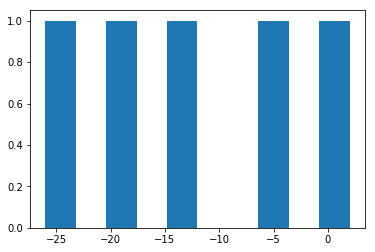

In [8]:
print(np.mean(np.diff(np.array(game.players[0].score))))
plt.hist(np.diff(np.array(game.players[0].score)));

## what do we want to store after trials:

We want:

1. to rank the strategies
2. to understand the difference between them (i.e. how much better is the advanced strategy than the basic strategy)


### what should we store:

We need:

1. player 1:
    - strategy
    - total rounds won
    - avg score per round
    - variance score per round
    - store a plot of the round scores (if possible)
    - total rounds played
2. player 2:
    - strategy
    - total rounds won
    - avg score per round
    - variance score per round
    - store a plot of the round scores (if possible)
    - total rounds played

### analysis we'll do:

For each combination of strategies, do the following:

1. 